In [1]:
# depedencies
import getpass
from topolib.subsetDat import subsetBBox;
from topolib import IceSat2Data
import glob
import rasterio
from topolib import gda_lib

In [3]:
# inputs
# if want to explcitly define bounding box, raster = None
datafolder = '/Users/hpm/HP_DRIVE/ICESat2-hackweek/topohack/data/'
datafolderOut = '/Users/hpm/HP_DRIVE/ICESat2-hackweek/topohack/data/out/'

#raster = '/Users/hpm/HP_DRIVE/ICESat2-hackweek/topohack/data/USCOGM20160604f1a1_bareDEM_3p0m.tif'
raster = '/Users/hpm/HP_DRIVE/ICESat2-hackweek/topohack/data/USCOGM20160926f1a1__lowest_vf_snowEX_extent.tif'
#raster = datafolder+'Tuolumne_snow-off_ASO.tif'
rasterBnd = 1

if rasterBnd == None:
    # Area of interest
    boundaries = {
        'LowerLeft_Lon': '-108.3',
        'LowerLeft_Lat': '38.8',
        'UpperRight_Lon': '-107.5',
        'UpperRight_Lat': '39.3',
    }

# Specify the variables of interest
LIce_var = ['atl06_quality_summary','delta_time','h_li','hli_sigma',\
           'latitude','longitude','segment_id','sigma_geo_h']
variables = {
    'beams': [
        '/land_ice_segments/'+LIce_var[0],
        '/land_ice_segments/'+LIce_var[1],
        '/land_ice_segments/'+LIce_var[2],
        '/land_ice_segments/'+LIce_var[3],
        '/land_ice_segments/'+LIce_var[4],
        '/land_ice_segments/'+LIce_var[5],
        '/land_ice_segments/'+LIce_var[6],
        '/land_ice_segments/'+LIce_var[7],
        '/ancillary_data/atlas_sdp_gps_epoch'
    ],
    'other': [
        '/orbit_info/cycle_number',
        '/orbit_info/rgt',
        '/orbit_info/orbit_number',
    ]
}

# Custom time range of interest
# define full_per = 1
full_per = 0
time_range = {
        'start_date': '2018-10-01',
        'end_date': '2019-01-01'
}

# Enter your Earthdata Login user name
user_id = 'hpmarshall'
# Enter your email address associated with your Earthdata Login account
email = 'hpmarshall@boisestate.edu'

In [4]:
# load DEM
import numpy as np
ds = rasterio.open(raster)
dem = ds.read(1)
dem = np.ma.masked_equal(dem,gda_lib.get_ndv(ds))
xmin,ymin,xmax,ymax = ds.bounds
ds.crs

CRS.from_epsg(32613)

In [5]:
# preprocessing
if rasterBnd != None:
    [L,B,R,T] = subsetBBox(raster,ds.crs,'epsg:4326') # now read projection from DEM, convert to WGS84
    #[L,B,R,T] = subsetBBox(raster,'epsg:32611','epsg:4326')
    # Area of interest
    boundaries = {
        'LowerLeft_Lon': L,
        'LowerLeft_Lat': B,
        'UpperRight_Lon': R,
        'UpperRight_Lat': T,
    }
L,B,R,T

(-108.25054215381618,
 38.95331140995811,
 -107.82705766529375,
 39.14002343946416)

In [6]:
# Earthdata Login credentials
password = getpass.getpass('Earthdata Login password: ')

# Setup a search session
search = IceSat2Data(user_id, password, variables=variables)

Earthdata Login password:  ········


In [7]:
# Show available variables
search.show_variables()

# Show available formats
search.show_formats()

['/ancillary_data',
 '/ancillary_data/atlas_sdp_gps_epoch',
 '/ancillary_data/control',
 '/ancillary_data/data_end_utc',
 '/ancillary_data/data_start_utc',
 '/ancillary_data/end_cycle',
 '/ancillary_data/end_delta_time',
 '/ancillary_data/end_geoseg',
 '/ancillary_data/end_gpssow',
 '/ancillary_data/end_gpsweek',
 '/ancillary_data/end_orbit',
 '/ancillary_data/end_region',
 '/ancillary_data/end_rgt',
 '/ancillary_data/granule_end_utc',
 '/ancillary_data/granule_start_utc',
 '/ancillary_data/qa_at_interval',
 '/ancillary_data/release',
 '/ancillary_data/start_cycle',
 '/ancillary_data/start_delta_time',
 '/ancillary_data/start_geoseg',
 '/ancillary_data/start_gpssow',
 '/ancillary_data/start_gpsweek',
 '/ancillary_data/start_orbit',
 '/ancillary_data/start_region',
 '/ancillary_data/start_rgt',
 '/ancillary_data/version',
 '/ancillary_data/land_ice',
 '/ancillary_data/land_ice/dt_hist',
 '/ancillary_data/land_ice/fit_maxiter',
 '/ancillary_data/land_ice/fpb_maxiter',
 '/ancillary_data/l

In [8]:
# Search for granules in bounding box without download through all datasets
search.search_granules(bounding_box=boundaries)

# Search for granules in bounding box without download for specific time range
search.search_granules(bounding_box=boundaries, time_range=time_range)

Number of granules:
    10
Average size of granules in MB:
    19.27881059648
Total size in MB:
    192.78810596480002
Number of granules:
    5
Average size of granules in MB:
    18.5811164856
Total size in MB:
    92.905582428


5

In [10]:
# NOTE: file paths have to be explicitly defined 
# BEFORE submitting 

params = {}
if full_per:
    params['time_range'] = time_range

# Submit a download order to NSIDC with no time restriction
search.order_data(
    email,
    datafolderOut,
    boundaries,
    **params
)

Number of granules:
    10
Average size of granules in MB:
    19.27881059648
Total size in MB:
    192.78810596480002
Order:  1
Request HTTP response:  201
order ID:  5000000320461
Data request  1  is submitting...
Initial request status is  processing
Status is not complete. Trying again.
Retry request status is:  complete_with_errors
error messages:
['161028994:NoMatchingData - No data found that matched subset constraints. '
 'Exit code 3.',
 '161084250:NoMatchingData - No data found that matched subset constraints. '
 'Exit code 3.',
 '161238717:NoMatchingData - No data found that matched subset constraints. '
 'Exit code 3.',
 '161252239:NoMatchingData - No data found that matched subset constraints. '
 'Exit code 3.',
 '161255398:NoMatchingData - No data found that matched subset constraints. '
 'Exit code 3.',
 '161322380:NoMatchingData - No data found that matched subset constraints. '
 'Exit code 3.',
 'PT1.923S',
 'ICESAT2']
Beginning download of zipped output...
Data reques

In [13]:
# latest version will move out%%
ATL06_list = glob.glob(datafolderOut+'*.h5') # removed **/

In [14]:
ATL06_list

['/Users/hpm/HP_DRIVE/ICESat2-hackweek/topohack/data/out/processed_ATL06_20181214194017_11790102_001_01.h5',
 '/Users/hpm/HP_DRIVE/ICESat2-hackweek/topohack/data/out/processed_ATL06_20181115210428_07370102_001_01.h5',
 '/Users/hpm/HP_DRIVE/ICESat2-hackweek/topohack/data/out/processed_ATL06_20190214164413_07370202_001_01.h5',
 '/Users/hpm/HP_DRIVE/ICESat2-hackweek/topohack/data/out/processed_ATL06_20181213075606_11560106_001_01.h5']

In [15]:
del ATL06_list[2] # x.to_crs crashed on this file
ATL06_list

['/Users/hpm/HP_DRIVE/ICESat2-hackweek/topohack/data/out/processed_ATL06_20181214194017_11790102_001_01.h5',
 '/Users/hpm/HP_DRIVE/ICESat2-hackweek/topohack/data/out/processed_ATL06_20181115210428_07370102_001_01.h5',
 '/Users/hpm/HP_DRIVE/ICESat2-hackweek/topohack/data/out/processed_ATL06_20181213075606_11560106_001_01.h5']

In [16]:
# read hdf5 into a geodataframe
#dataset_dict={'land_ice_segments':LIce_var, 'land_ice_segments/ground_track':['x_atc']}
dataset_dict={'land_ice_segments':['h_li', 'delta_time','longitude','latitude'], 'land_ice_segments/ground_track':['x_atc']}

In [17]:
## add recursively
ATL06_gdf_list = [gda_lib.ATL06_2_gdf(x,dataset_dict) for x in ATL06_list]
ATL06_gdf_list = [x.to_crs(ds.crs) for x in ATL06_gdf_list]
ATL06_gdf_list

[            h_li    delta_time   longitude   latitude  pair  beam      p_b  \
 0    2206.589844  3.005180e+07 -107.849555  38.953372   1.0   0.0  1.0_0.0   
 1    2201.921143  3.005180e+07 -107.849578  38.953552   1.0   0.0  1.0_0.0   
 2    2196.188477  3.005180e+07 -107.849601  38.953732   1.0   0.0  1.0_0.0   
 3    2190.114502  3.005180e+07 -107.849624  38.953911   1.0   0.0  1.0_0.0   
 4    2184.678955  3.005180e+07 -107.849646  38.954091   1.0   0.0  1.0_0.0   
 5            NaN  3.005180e+07 -107.849668  38.954271   1.0   0.0  1.0_0.0   
 6    2189.340576  3.005180e+07 -107.849689  38.954451   1.0   0.0  1.0_0.0   
 7    2197.891357  3.005180e+07 -107.849711  38.954630   1.0   0.0  1.0_0.0   
 8    2206.177490  3.005180e+07 -107.849732  38.954810   1.0   0.0  1.0_0.0   
 9    2212.720459  3.005180e+07 -107.849753  38.954990   1.0   0.0  1.0_0.0   
 10   2218.705078  3.005180e+07 -107.849775  38.955170   1.0   0.0  1.0_0.0   
 11   2221.957520  3.005180e+07 -107.849798  38.9553

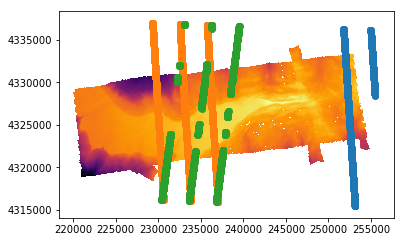

In [19]:
# seems to have removed some IceSAT2 lines that are in Profiling_struggle.ipynb
import matplotlib.pyplot as plt 
fig,ax = plt.subplots()
im = ax.imshow(dem,cmap='inferno',extent=[xmin,xmax,ymin,ymax])
#ATL06_gdf_list[1].plot(ax=ax)
for gdf in ATL06_gdf_list:
    gdf.plot(ax=ax)

In [20]:
# now compare for the strong beam
df1,df2,df3,df4,df5,df6 = [x for x_,x in ATL06_gdf_list[1].groupby(ATL06_gdf_list[1]['p_b'])] #pick 1 ATL06 and seperate it into 6 

In [21]:
df_list = [df1,df2,df3,df4,df5,df6]

0.05752819276924951 0.9443254385386194 0.004609289088659042
0.03967308859223301 0.6791664159385378 0.003197899727920113
0.1323555509657341 0.4975976388771778 0.013062083862234066
0.09831652807067996 0.800286688914635 0.009698635173247795
0.3069493479145792 0.7019528449557404 0.027636293415419882
0.266625244140625 0.8291083430310354 0.02375980276764063


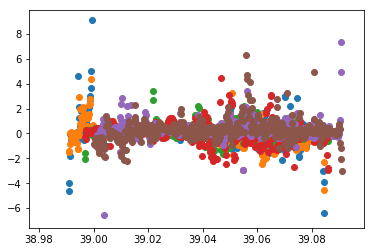

In [22]:
df_test = gda_lib.buffer_sampler(ds,df_list[5],20,ret_gdf=True)
df_test['snow_on_off'] = df_test['h_li']-df_test['med']
df_test
fig,ax = plt.subplots()
for gdf in df_list:
    df_test = gda_lib.buffer_sampler(ds,gdf,20,ret_gdf=True)
    df_test['snow_on_off'] = df_test['h_li']-df_test['med']
    ax.scatter(df_test['latitude'],df_test['snow_on_off'])
    print(df_test['snow_on_off'].mean(),df_test['snow_on_off'].std(),100*df_test['snow_on_off'].mean()/(df_test['h_li'].max()-df_test['h_li'].min()))
#df_test['snow_on_off'].hist(bins=30)
#ax.scatter(df_test['latitude'],df_test['snow_on_off'])

(3005, 3270)

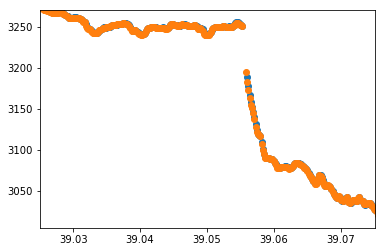

In [23]:
fig,ax = plt.subplots()
ax.scatter(df_test['latitude'],df_test['h_li'])
ax.scatter(df_test['latitude'],df_test['med'])
ax.set_xlim(39.025,39.075)
ax.set_ylim(3005,3270)


In [54]:
#%matplotlib notebook
#import matplotlib.pyplot as plt
#fig2,ax2 = plt.subplots()
#im = ax.imshow(dem,cmap='inferno',extent=[xmin,xmax,ymin,ymax])
#plt.colorbar(im,label='HAE (m WGS84)')
#for gdf in ATL06_gdf_list:
#    gdf.plot(ax=ax)
#ATL06_gdf.plot(ax=ax)

In [55]:
#plt.subplots()

In [56]:
#pwd